Simple deep learning application that learns to recognize if a chest x-ray is a frontal or lateral. 

This is my first attempt at a deep learning application in radiology (I am not a programmer, so please be patient with my programming grammar).

Prerequisites:
    Python with libraries: numpy, scipy.misc, os, matplotlib, Keras (I used tensorflow as backend, not tested with theano or others)

It consists of these parts:
    1. Download data
    2. Import libraries
    3. Label the training set
    4. Normale the data and preparing it for training
    5. Train the model (convolutional neural network)
    6. Use the model for placing other chest x-ray images into different folders (frontal or lateral)
    
Let´s get started!

Part 1: Download chest x-rays (they are in png format). 

The x-rays I used are from Indiana University hospital, available on Open-i service. 
You can read more about it here: https://openi.nlm.nih.gov/faq.php
Link to the files directly: https://openi.nlm.nih.gov/imgs/collections/NLMCXR_png.tgz
Unzip them and place the whole "NLMCXR_png" folder at the same location as this python script.

In [1]:
# Part 2: Import libraries

import numpy as np
import scipy.misc
import os
import matplotlib.pyplot as plt

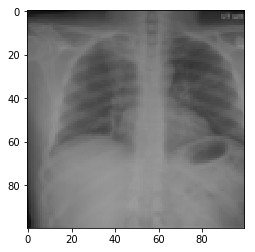

1
1


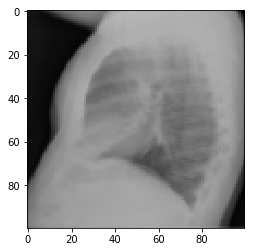

2
0


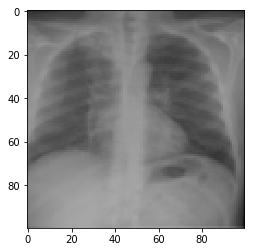

3
1


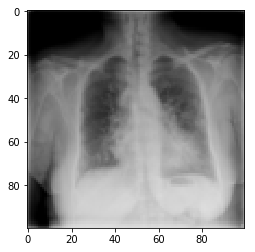

4
1


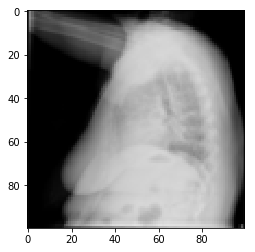

5
0


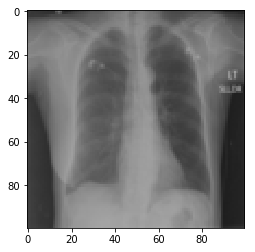

6
1


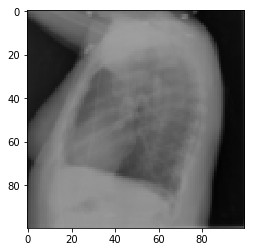

7
0


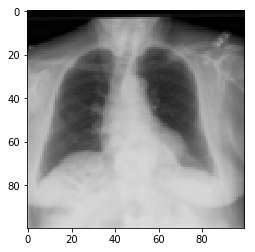

8
1


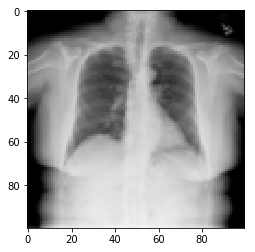

9
1


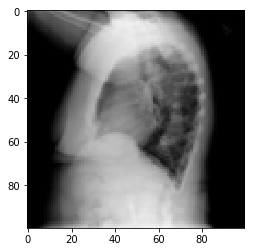

10
0


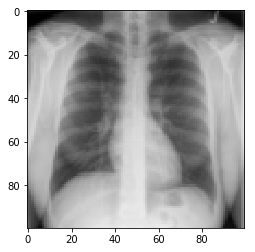

11
1


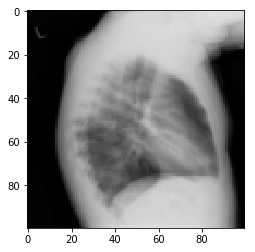

12
0


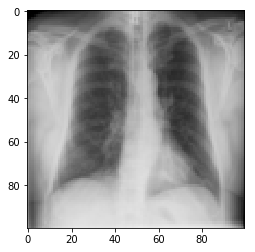

13
1


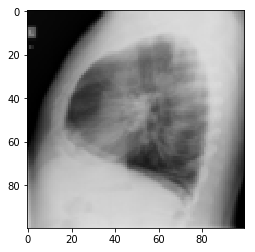

14
0


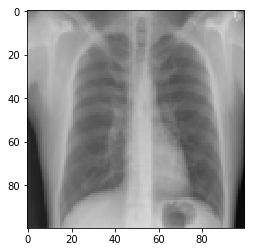

15
1


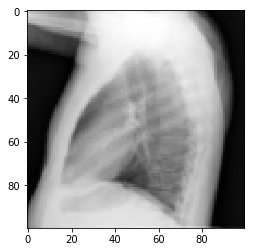

16
0


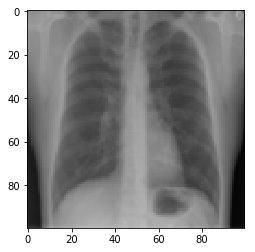

17
1


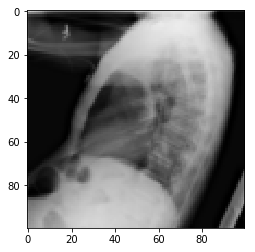

18
0


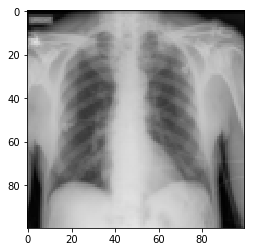

19
1


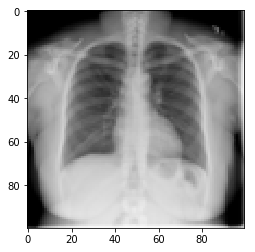

20
1


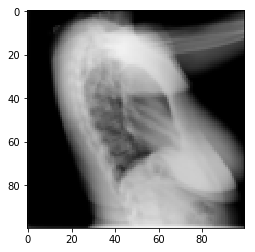

21
0


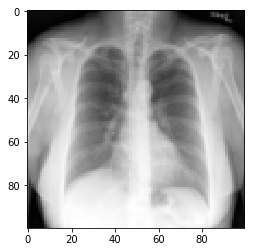

22
1


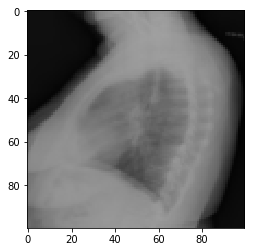

23
0


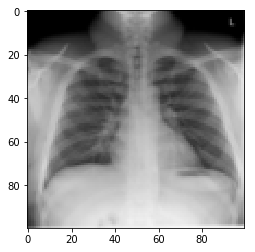

24
1


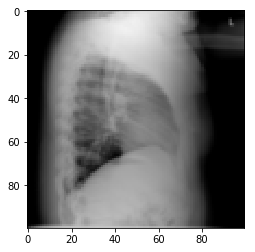

25
0


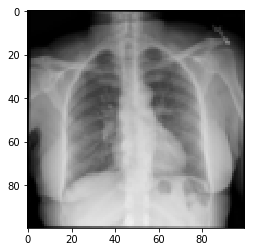

26
1


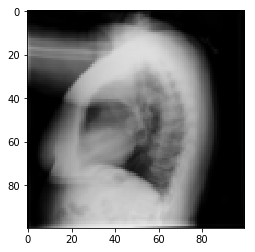

27
0


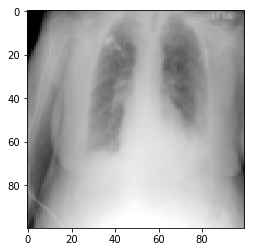

28
1


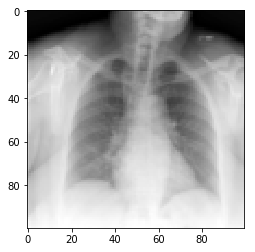

29
1


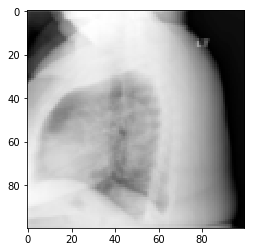

30
0


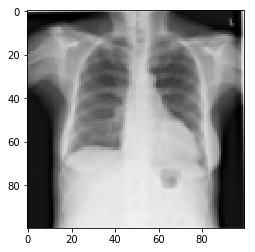

31
1


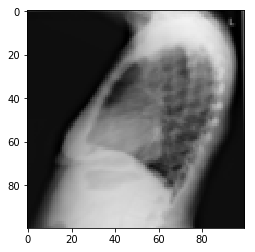

32
0


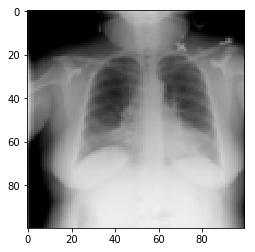

33
1


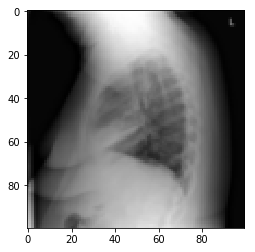

34
0


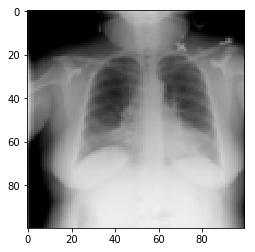

35
1


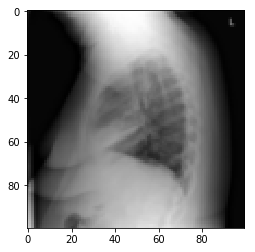

36
0


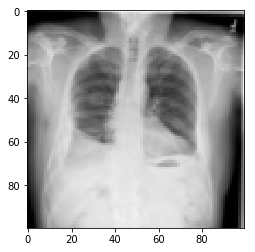

37
1


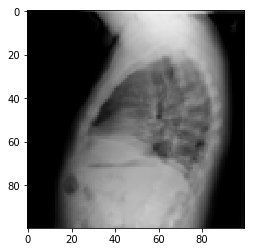

38
0


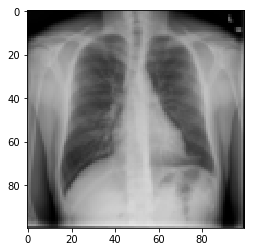

39
1


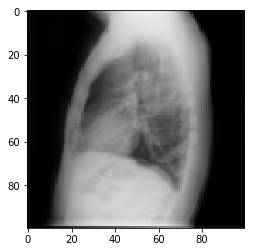

40
0


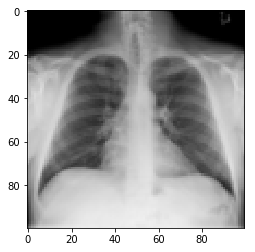

41
1


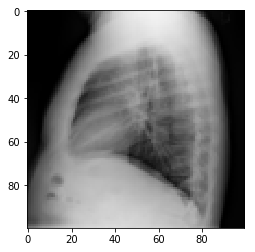

42
0


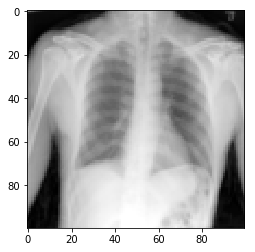

43
1


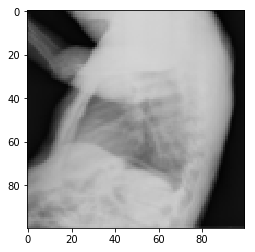

44
0


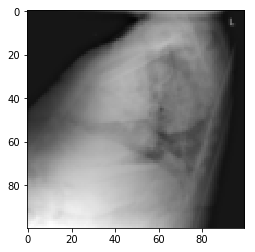

45
0


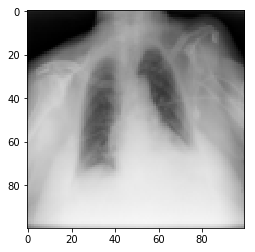

46
1


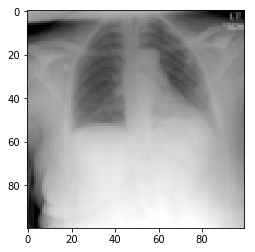

47
1


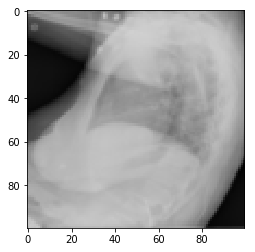

48
0


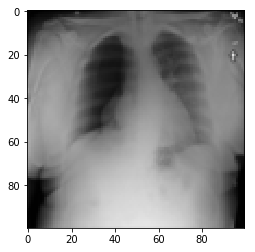

49
1


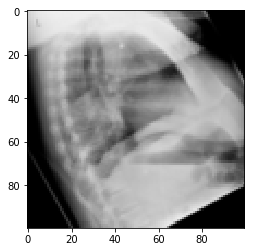

50
0


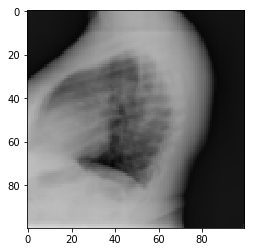

51
0


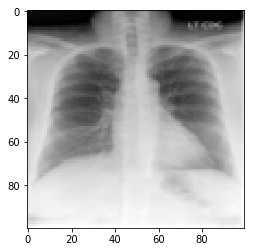

52
1


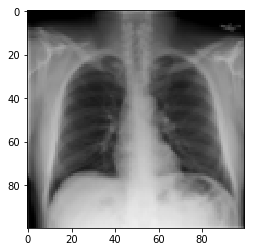

53
1


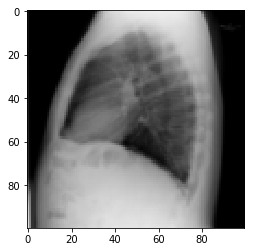

54
0


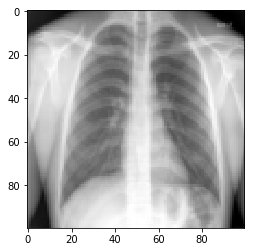

55
1


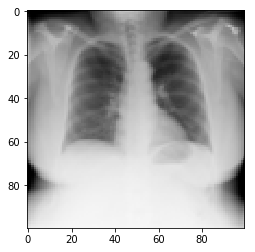

56
1


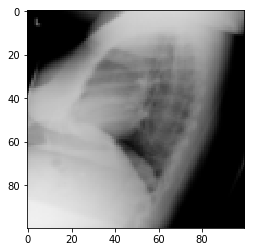

57
0


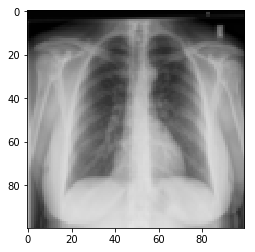

58
1


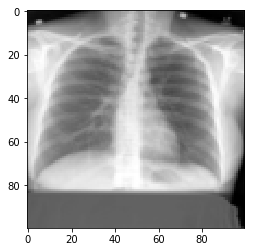

59
1


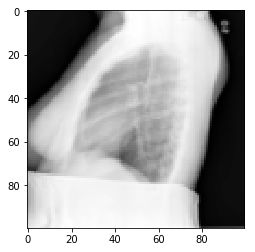

60
0


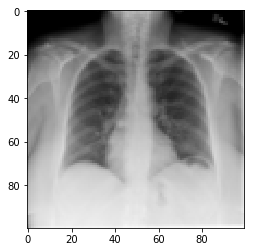

61
1


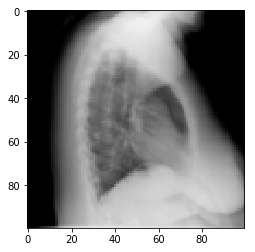

62
0


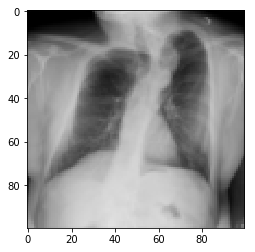

63
1


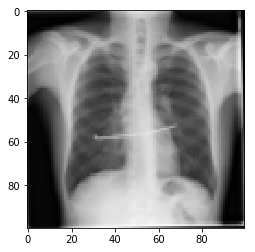

64
1


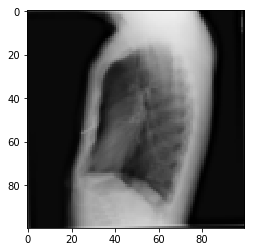

65
0


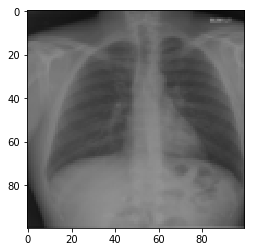

66
1


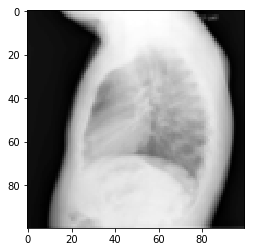

67
0


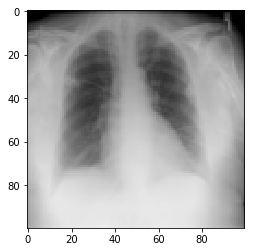

68
1


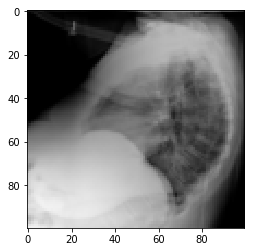

69
0


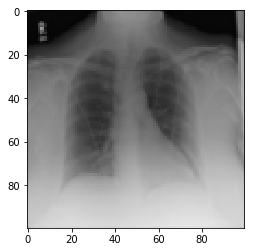

70
1


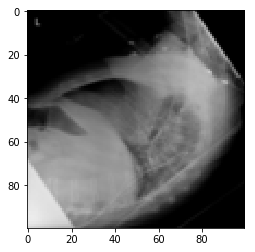

71
0


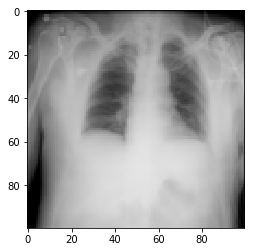

72
1


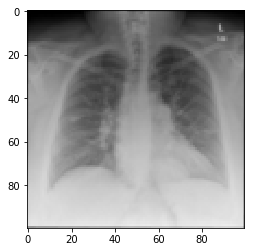

73
1


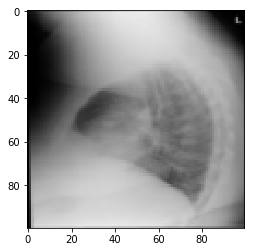

74
0


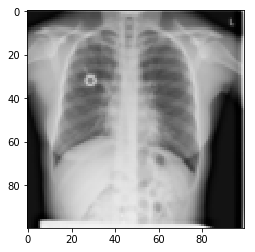

75
1


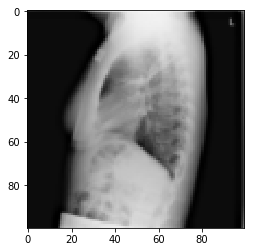

76
0


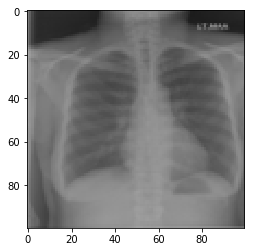

77
1


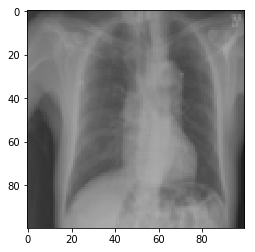

78
1


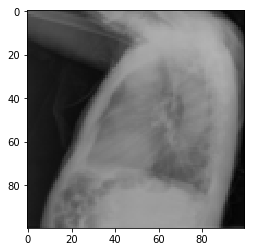

79
0


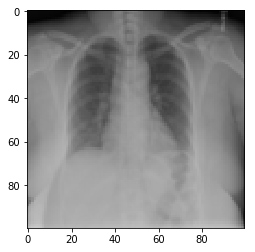

80
1


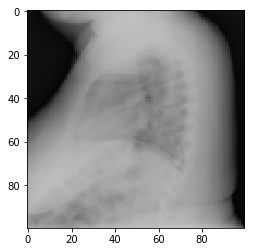

81
0


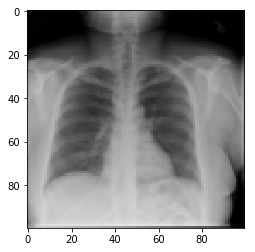

82
1


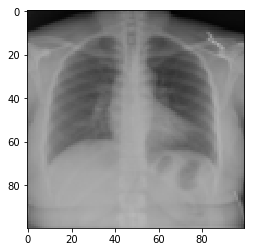

83
1


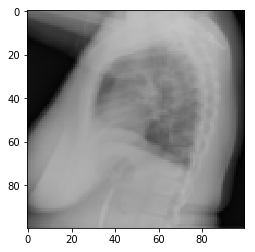

84
0


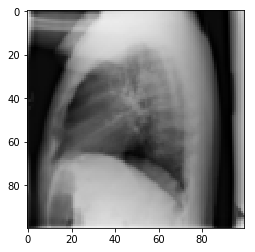

85
0


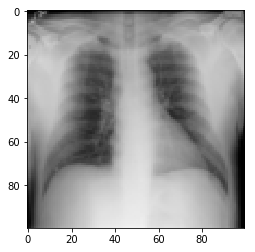

86
1


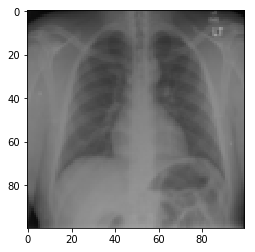

87
1


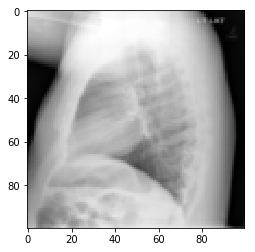

88
0


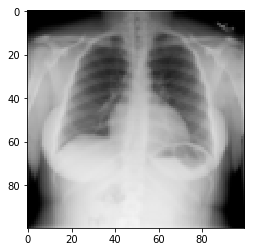

89
1


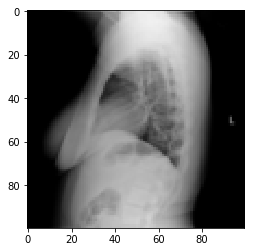

90
0


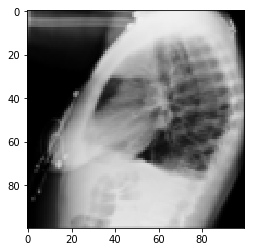

91
0


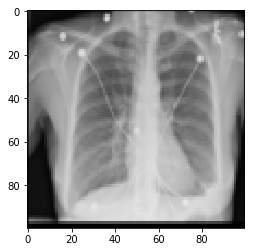

92
1


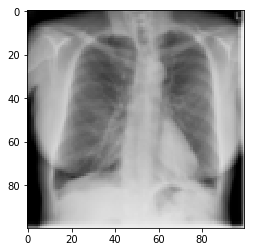

93
1


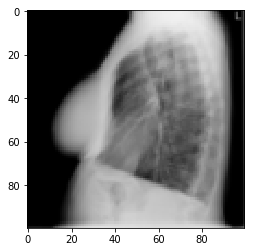

94
0


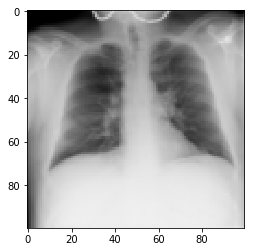

95
1


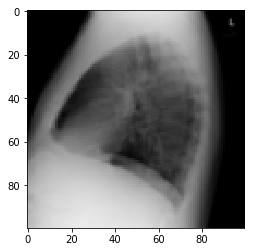

96
0


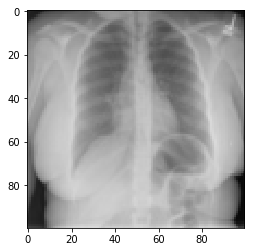

97
1


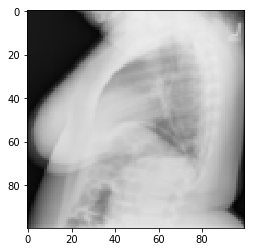

98
0


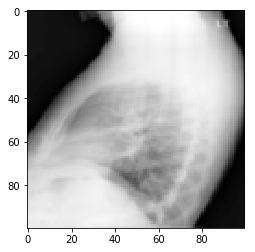

99
0


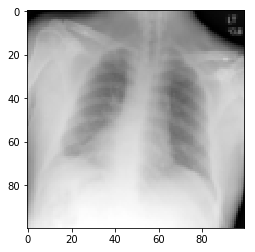

100
1


In [2]:
# Part 3: Label and set up the training set. It will display one image at a time and you have to enter 
#         whether it is a frontal (write 1) or lateral (write 0), ending with enter key. Uses a training set of 100.
#         This part requires your concentration. One simple mistake (entering "11" instead of "1" or entering a 
#         different number entirely) and you will have to start over.

folder = "NLMCXR_png/"
count = 0
volume = np.array(())                                #defines what will become the training dataset
correct = np.array(())                               #defines what will become the labeling information

for i in os.listdir(folder):
    if i.endswith("png"):
        a = scipy.misc.imread(folder+i)              #opens the images
        a = scipy.misc.imresize(a, [100,100,3])      #reformats the image to be 100 x 100 pixels
        plt.imshow(a, cmap='Greys_r')
        plt.show()                                   #shows the reformated image
        count = count + 1
        print(count)                                 #prints on which number you are (just to keep up the motivation)
        volume = np.append(volume, a)                #adds the image to training dataset
        correct = np.append(correct, input())        #asks for input to and adds to labeling information
        if count == 100:                             #the training set will consist of the first 100 images
            break

volume = np.reshape(volume, (100,100,100,3))         #preparing dataset to correct format for training
correct = np.reshape(correct,[100,1])                #preparing labeling to correct format
correct = correct.astype(int)                        #preparing labeling to correct format

In [3]:
# Part 4: Normalizing. To learn a neural network, the input values have to be smaller than 1. This is a script
#         for normalizing that I found here: https://github.com/raghakot/keras-vis/blob/master/vis/utils/utils.py

from keras import backend as K
def normalize(array, min_value=0., max_value=1.):
    arr_min = np.min(array)
    arr_max = np.max(array)
    normalized = (array - arr_min) / (arr_max - arr_min + K.epsilon())
    return (max_value - min_value) * normalized + min_value

volume = normalize(volume) # Normalizing the training data to be between 0 and 1

Using TensorFlow backend.


In [4]:
# Part 5: Training the model. The model is taken from: https://keras.io/getting-started/sequential-model-guide/
#         A few parts have been slightly altered since we don´t need a testing dataset and I raised number of epochs
#         from 10 to 30.

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

x_train = volume
y_train = keras.utils.to_categorical(correct, num_classes=2)

model = Sequential()
# input: 100 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
100/100 [==============================] - 7s - loss: 0.6744     
Epoch 2/30
100/100 [==============================] - 6s - loss: 0.4927     
Epoch 3/30
100/100 [==============================] - 5s - loss: 0.5300     
Epoch 4/30
100/100 [==============================] - 5s - loss: 0.1516     

In [5]:
# Part 6: Using the model on the whole folder of x-rays. This places the images to separate folders based on
#         the model classification of each image. Takes some time, but you can go to the folders and see the progress

folder = "NLMCXR_png/"
os.mkdir("frontals")                                                         #creates new directory to put frontals
os.mkdir("laterals")                                                         #creates new directory to put laterals

for i in os.listdir(folder):
    if i.endswith("png"):
        a = scipy.misc.imread(folder+i)
        a = scipy.misc.imresize(a, [100,100,3])                              #resizing to be 100 x 100
        a = normalize(a)                                                     #normalizing to be values between 0 and 1
        if model.predict_classes(np.reshape(a,[1,100,100,3]), verbose=0)==1: #this is where the prediction takes place
            os.rename(folder+i, "frontals/"+i)                               #if frontal - move image to "frontals"
        else:
            os.rename(folder+i, "laterals/"+i)                               #else move image to "laterals"

If you got it working - congratulations!

The results are ok, not great - my guess is about 95-98% correct classification when looking quickly in the folders. 

The main thing I think would make results much better is more training data. Either more real data by labeling more images, or augmenting images (read here about augmenting images: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html). Note that in that link they call 2400 (1000+1000+400) images "very little data", while we used 100 and not evenly distributed (not same amount of frontals and laterals in training data)  :). There are of course also many other things you can improve...maybe you can think of any?

I hope you enjoyed this. Please comment on whatever you wish :).

At https://dlinradiology.wordpress.com/ we are working on collecting resources for learning and developing deep learning applications for radiology. Perhaps you will find it helpful as well.